<a href="https://colab.research.google.com/github/Maetamongminji/seminar_in_stats/blob/main/Midterm_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **심리 성향 예측**
#### **-마키아벨리즘 심리테스트를 활용하여 테스트 참가자의 국가 선거 투표 여부 예측하기**

### __Background__

- 심리학 테스트의 범주가 넓어짐에 따라 해당 영역의 데이터 분석 방법 탐구
- 국가 선거 투표자/미투표자의 심리학적 성향을 분석

변수 설명 링크

https://www.dacon.io/competitions/official/235647/talkboard/401534?page=1&dtype=recent&ptype=pub

In [97]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings 
warnings.filterwarnings('ignore')

In [98]:
# data loading

train = pd.read_csv('/content/data/train.csv', index_col=0)
test = pd.read_csv('/content/data/test_x.csv', index_col=0)
submission = pd.read_csv('/content/data/sample_submission.csv', index_col=0)  

# checking shape of the data
print(train.shape)
print(test.shape)
print(submission.shape)

(45532, 77)
(11383, 76)
(11383, 1)


In [99]:
pd.set_option('display.max_columns', 100) # There are a lot of columns in our dataset so set max_columns as 100.
train.head(5) 

,QaA,QaE,QbA,QbE,QcA,QcE,QdA,QdE,QeA,QeE,QfA,QfE,QgA,QgE,QhA,QhE,QiA,QiE,QjA,QjE,QkA,QkE,QlA,QlE,QmA,QmE,QnA,QnE,QoA,QoE,QpA,QpE,QqA,QqE,QrA,QrE,QsA,QsE,QtA,QtE,age_group,education,engnat,familysize,gender,hand,married,race,religion,tp01,tp02,tp03,tp04,tp05,tp06,tp07,tp08,tp09,tp10,urban,voted,wf_01,wf_02,wf_03,wr_01,wr_02,wr_03,wr_04,wr_05,wr_06,wr_07,wr_08,wr_09,wr_10,wr_11,wr_12,wr_13
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,3.0,363,4.0,1370,5.0,997,1.0,1024,2.0,1577,5.0,539,2.0,586,4.0,1095,5.0,1142,4.0,1287,4.0,883,4.0,851,2.0,851,5.0,816,2.0,579,2.0,924,2.0,366,2.0,876,2.0,633,1.0,1115,30s,2,1,4,Female,1,3,White,Other,2,2,2,1,2,1,7,4,4,3,1,2,0,0,0,0,1,0,0,1,0,1,1,0,1,0,1,1
1,5.0,647,5.0,1313,3.0,3387,5.0,2969,1.0,4320,3.0,2190,1.0,826,1.0,4082,5.0,1867,3.0,1264,5.0,2943,4.0,3927,1.0,4329,5.0,1828,1.0,1214,5.0,2414,5.0,1356,1.0,3039,4.0,4304,1.0,1346,20s,4,2,3,Female,1,1,Asian,Hindu,1,1,0,0,1,2,3,4,0,4,3,2,0,0,0,0,1,0,1,1,0,1,1,0,1,0,1,1
2,4.0,1623,1.0,1480,1.0,1021,4.0,3374,5.0,1333,1.0,531,4.0,1167,1.0,1016,3.0,2653,2.0,1569,5.0,998,5.0,2547,2.0,918,4.0,2153,2.0,1304,1.0,1131,5.0,937,4.0,1327,1.0,1170,1.0,1409,30s,3,1,3,Male,1,2,White,Other,2,3,1,5,3,4,2,6,1,3,2,1,0,0,1,1,1,0,1,1,0,1,1,1,1,0,1,1
3,3.0,504,3.0,2311,4.0,992,3.0,3245,1.0,357,2.0,1519,4.0,159,3.0,2275,5.0,2809,4.0,5614,3.0,3219,4.0,1296,4.0,9046,4.0,1216,4.0,1169,4.0,23868,3.0,581,4.0,8830,4.0,2392,5.0,1312,20s,4,2,0,Female,1,1,Asian,Hindu,2,4,1,1,1,3,1,3,1,3,3,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,1
4,1.0,927,1.0,707,5.0,556,2.0,1062,1.0,1014,2.0,628,1.0,991,1.0,1259,5.0,1153,5.0,1388,5.0,740,5.0,1181,4.0,547,2.0,575,1.0,754,4.0,1140,5.0,323,5.0,1070,1.0,583,2.0,1889,20s,3,1,2,Male,1,2,White,Agnostic,1,1,1,6,0,2,0,6,2,6,1,1,0,1,0,1,1,0,1,1,1,1,1,0,1,1,1,1


In [100]:
train.columns # Checking columns of the train data

Index(['QaA', 'QaE', 'QbA', 'QbE', 'QcA', 'QcE', 'QdA', 'QdE', 'QeA', 'QeE',
       'QfA', 'QfE', 'QgA', 'QgE', 'QhA', 'QhE', 'QiA', 'QiE', 'QjA', 'QjE',
       'QkA', 'QkE', 'QlA', 'QlE', 'QmA', 'QmE', 'QnA', 'QnE', 'QoA', 'QoE',
       'QpA', 'QpE', 'QqA', 'QqE', 'QrA', 'QrE', 'QsA', 'QsE', 'QtA', 'QtE',
       'age_group', 'education', 'engnat', 'familysize', 'gender', 'hand',
       'married', 'race', 'religion', 'tp01', 'tp02', 'tp03', 'tp04', 'tp05',
       'tp06', 'tp07', 'tp08', 'tp09', 'tp10', 'urban', 'voted', 'wf_01',
       'wf_02', 'wf_03', 'wr_01', 'wr_02', 'wr_03', 'wr_04', 'wr_05', 'wr_06',
       'wr_07', 'wr_08', 'wr_09', 'wr_10', 'wr_11', 'wr_12', 'wr_13'],
      dtype='object')

In [101]:
# Checking missing values
pd.set_option('display.max_rows', 100) # To check missing values of all the columns

print('missing values in train set : ',train.isnull().sum()) # no missing value
print('missing values in test set  : ',test.isnull().sum()) # no missing value

missing values in train set :  QaA           0
QaE           0
QbA           0
QbE           0
QcA           0
QcE           0
QdA           0
QdE           0
QeA           0
QeE           0
QfA           0
QfE           0
QgA           0
QgE           0
QhA           0
QhE           0
QiA           0
QiE           0
QjA           0
QjE           0
QkA           0
QkE           0
QlA           0
QlE           0
QmA           0
QmE           0
QnA           0
QnE           0
QoA           0
QoE           0
QpA           0
QpE           0
QqA           0
QqE           0
QrA           0
QrE           0
QsA           0
QsE           0
QtA           0
QtE           0
age_group     0
education     0
engnat        0
familysize    0
gender        0
hand          0
married       0
race          0
religion      0
tp01          0
tp02          0
tp03          0
tp04          0
tp05          0
tp06          0
tp07          0
tp08          0
tp09          0
tp10          0
urban         0
voted    

## **DATA PREPROCESSING**

In [102]:
train.familysize.unique() # Some family size values seem to be outliers. 

array([         4,          3,          0,          2,          6,
                1,          5,          8,          7,          9,
              999,         11,         10,         15,         14,
               12,         21,         13,         20,         44,
               16, 2147483647,         17,        100,         34,
               30,         18])

In [103]:
# Eliminating outliers in 'familysize'

train = train[train.familysize < 30]
print(train.shape) # The shape of the original train dataset was (45532, 77). 8 rows were eliminated. 

(45524, 77)


In [104]:
test.familysize.unique() # There are no values equal to or greater than 30, so no need to be eliminated

array([ 3,  2,  7,  4,  1,  0,  5,  6,  8,  9, 10, 11, 23, 12, 15, 14, 20])

In [105]:
# drop some variables that are not helpful for predicting

drop = ['QaE', 'QbE', 'QcE', 'QdE', 'QeE','QfE', 'QgE', 'QhE', 'QiE', 'QjE',
             'QkE', 'QlE', 'QmE', 'QnE', 'QoE','QpE', 'QqE', 'QrE', 'QsE', 'QtE'
             , 'hand']

train.drop(drop,axis=1,inplace=True)
test.drop(drop,axis=1,inplace=True)

In [106]:
print(train.shape)
print(test.shape)

(45524, 56)
(11383, 55)


In [107]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45524 entries, 0 to 45531
Data columns (total 56 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   QaA         45524 non-null  float64
 1   QbA         45524 non-null  float64
 2   QcA         45524 non-null  float64
 3   QdA         45524 non-null  float64
 4   QeA         45524 non-null  float64
 5   QfA         45524 non-null  float64
 6   QgA         45524 non-null  float64
 7   QhA         45524 non-null  float64
 8   QiA         45524 non-null  float64
 9   QjA         45524 non-null  float64
 10  QkA         45524 non-null  float64
 11  QlA         45524 non-null  float64
 12  QmA         45524 non-null  float64
 13  QnA         45524 non-null  float64
 14  QoA         45524 non-null  float64
 15  QpA         45524 non-null  float64
 16  QqA         45524 non-null  float64
 17  QrA         45524 non-null  float64
 18  QsA         45524 non-null  float64
 19  QtA         45524 non-nul

___
- education : 교육 수준  
1=Less than high school, 2=High school, 3=University degree, 4=Graduate degree, 0=무응답
- engnat : 모국어가 영어  
1=Yes, 2=No, 0=무응답
- married : 혼인 상태  
1=Never married, 2=Currently married, 3=Previously married, 0=Other
- urban : 유년기의 거주 구역  
1=Rural (country side), 2=Suburban, 3=Urban (town, city), 0=무응답

Above variables are nominal variables but are considered an int64 type.
___

In [108]:
# Change data type of nominal variables

train['education'] = train['education'].astype('str')
test['education'] = test['education'].astype('str')

train['engnat'] = train['engnat'].astype('str')
test['engnat'] = test['engnat'].astype('str')

train['married'] = train['married'].astype('str')
test['married'] = test['married'].astype('str')

train['urban'] = train['urban'].astype('str')
test['urban'] = test['urban'].astype('str')

In [109]:
train_y = train['voted'] # seperate y from the train dataset
train.drop('voted',axis=1,inplace=True) # After seperation, drop 'voted'(y) from 'train'

<BarContainer object of 2 artists>

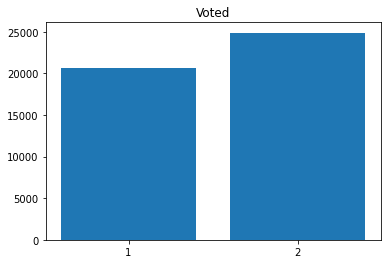

In [113]:
# visualization of target variable

unique = [str(train_y.unique()[1]), str(train_y.unique()[0])]
count = [train_y.value_counts()[1], train_y.value_counts()[2]]
plt.title('Voted')
plt.bar(unique, count)

___
About TIPI(Ten-Item Personality Inventory) + How to calculate TIPI score  
https://brunch.co.kr/@a376100/45
___

tp__(01~07) : items were rated "I see myself as:" _____ such that  

tp01 : Extraverted, enthusiastic.  
tp02 : Critical, quarrelsome.  
tp03 : Dependable, self-disciplined.  
tp04 : Anxious, easily upset.  
tp05 : Open to new experiences, complex.  
tp06 : Reserved, quiet.  
tp07 : Sympathetic, warm.  
tp08 : Disorganized, careless.  
tp09 : Calm, emotionally stable.  
tp10 : Conventional, uncreative.

<br>

___

In [114]:
tipi_list = [i for i in train.columns if 'tp' in i]

In [115]:
train[tipi_list].head(5)

,tp01,tp02,tp03,tp04,tp05,tp06,tp07,tp08,tp09,tp10
index,,,,,,,,,,
0,2,2,2,1,2,1,7,4,4,3
1,1,1,0,0,1,2,3,4,0,4
2,2,3,1,5,3,4,2,6,1,3
3,2,4,1,1,1,3,1,3,1,3
4,1,1,1,6,0,2,0,6,2,6


In [116]:
# Change 'no response' to null(to calculate TIPI score)

# for training dataset
train.loc[train['tp01']==7,'tp01'] = np.nan
train.loc[train['tp02']==7,'tp02'] = np.nan
train.loc[train['tp03']==7,'tp03'] = np.nan
train.loc[train['tp04']==7,'tp04'] = np.nan
train.loc[train['tp05']==7,'tp05'] = np.nan
train.loc[train['tp06']==7,'tp06'] = np.nan
train.loc[train['tp07']==7,'tp07'] = np.nan
train.loc[train['tp08']==7,'tp08'] = np.nan
train.loc[train['tp09']==7,'tp09'] = np.nan
train.loc[train['tp10']==7,'tp10'] = np.nan

# for test dataset
test.loc[test['tp01']==7,'tp01'] = np.nan
test.loc[test['tp02']==7,'tp02'] = np.nan
test.loc[test['tp03']==7,'tp03'] = np.nan
test.loc[test['tp04']==7,'tp04'] = np.nan
test.loc[test['tp05']==7,'tp05'] = np.nan
test.loc[test['tp06']==7,'tp06'] = np.nan
test.loc[test['tp07']==7,'tp07'] = np.nan
test.loc[test['tp08']==7,'tp08'] = np.nan
test.loc[test['tp09']==7,'tp09'] = np.nan
test.loc[test['tp10']==7,'tp10'] = np.nan

In [117]:
# Fill NA with mean value

train = train.fillna(train.mean())
test = test.fillna(test.mean())

### Caculating TIPI Score

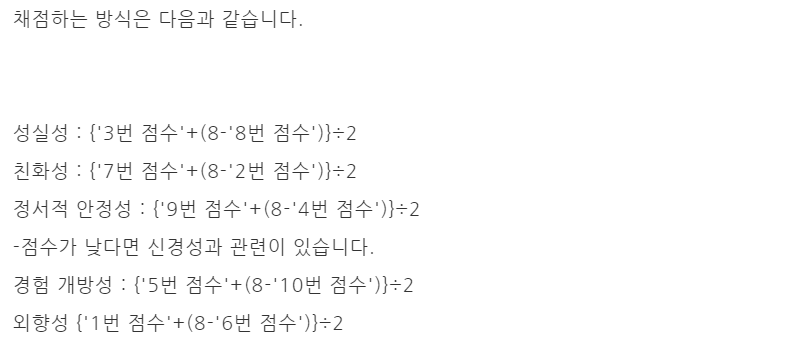

In [118]:
# Caculate 5 scores with above formula

# for training dataset
train['TIPI_ex'] = (train['tp01']+8-(train['tp06']))/2    # Extraversion
train['TIPI_ag'] = (train['tp07']+8-(train['tp02']))/2    # Agreeableness
train['TIPI_co'] = (train['tp03']+8-(train['tp08']))/2    # Conscientiousness
train['TIPI_em'] = (train['tp09']+8-(train['tp04']))/2    # Emotional Stability
train['TIPI_op'] = (train['tp05']+8-(train['tp10']))/2    # Openness to Experiences

# for test dataset
test['TIPI_ex'] = (test['tp01']+8-(test['tp06']))/2
test['TIPI_ag'] = (test['tp07']+8-(test['tp02']))/2
test['TIPI_co'] = (test['tp03']+8-(test['tp08']))/2
test['TIPI_em'] = (test['tp09']+8-(test['tp04']))/2
test['TIPI_op'] = (test['tp05']+8-(test['tp10']))/2

In [119]:
# transforming for calculating Machiavellism Test Score

Answers = ['QaA', 'QbA', 'QcA', 'QdA', 'QeA', 'QfA', 'QgA', 'QhA', 'QiA', 'QjA', 
           'QkA', 'QlA', 'QmA', 'QnA', 'QoA', 'QpA', 'QqA', 'QrA', 'QsA', 'QtA']


# for training dataset

flipping_columns = ["QeA", "QfA", "QkA", "QqA", "QrA"]
for flip in flipping_columns: 
    train[flip] = 6 - train[flip]
    
flipping_secret_columns = ["QaA", "QdA", "QgA", "QiA", "QnA"]
for flip in flipping_secret_columns: 
    train[flip] = 6 - train[flip]


# for test dataset    
    
flipping_columns = ["QeA", "QfA", "QkA", "QqA", "QrA"]
for flip in flipping_columns: 
    test[flip] = 6 - test[flip]
    
flipping_secret_columns = ["QaA", "QdA", "QgA", "QiA", "QnA"]
for flip in flipping_secret_columns: 
    test[flip] = 6 - test[flip]

    
train['Mach_score'] = train[Answers].mean(axis = 1)
test['Mach_score'] = test[Answers].mean(axis = 1)

In [120]:
# One-hot encode categorical variables

train = pd.get_dummies(train)
test = pd.get_dummies(test)

In [121]:
train.head(5)

,QaA,QbA,QcA,QdA,QeA,QfA,QgA,QhA,QiA,QjA,QkA,QlA,QmA,QnA,QoA,QpA,QqA,QrA,QsA,QtA,familysize,tp01,tp02,tp03,tp04,tp05,tp06,tp07,tp08,tp09,tp10,wf_01,wf_02,wf_03,wr_01,wr_02,wr_03,wr_04,wr_05,wr_06,wr_07,wr_08,wr_09,wr_10,wr_11,wr_12,wr_13,TIPI_ex,TIPI_ag,TIPI_co,TIPI_em,TIPI_op,Mach_score,age_group_+70s,age_group_10s,age_group_20s,age_group_30s,age_group_40s,age_group_50s,age_group_60s,education_0,education_1,education_2,education_3,education_4,engnat_0,engnat_1,engnat_2,gender_Female,gender_Male,married_0,married_1,married_2,married_3,race_Arab,race_Asian,race_Black,race_Indigenous Australian,race_Native American,race_Other,race_White,religion_Agnostic,religion_Atheist,religion_Buddhist,religion_Christian_Catholic,religion_Christian_Mormon,religion_Christian_Other,religion_Christian_Protestant,religion_Hindu,religion_Jewish,religion_Muslim,religion_Other,religion_Sikh,urban_0,urban_1,urban_2,urban_3
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,3.0,4.0,5.0,5.0,4.0,1.0,4.0,4.0,1.0,4.0,2.0,4.0,2.0,1.0,2.0,2.0,4.0,4.0,2.0,1.0,4,2.0,2.0,2.0,1.0,2.0,1.0,1.994202,4.0,4.0,3.0,0,0,0,0,1,0,0,1,0,1,1,0,1,0,1,1,4.5,3.997101,3.0,5.5,3.5,2.95,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
1,1.0,5.0,3.0,1.0,5.0,3.0,5.0,1.0,1.0,3.0,1.0,4.0,1.0,1.0,1.0,5.0,1.0,5.0,4.0,1.0,3,1.0,1.0,0.0,0.0,1.0,2.0,3.000000,4.0,0.0,4.0,0,0,0,0,1,0,1,1,0,1,1,0,1,0,1,1,3.5,5.000000,2.0,4.0,2.5,2.60,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
2,2.0,1.0,1.0,2.0,1.0,5.0,2.0,1.0,3.0,2.0,1.0,5.0,2.0,2.0,2.0,1.0,1.0,2.0,1.0,1.0,3,2.0,3.0,1.0,5.0,3.0,4.0,2.000000,6.0,1.0,3.0,0,0,1,1,1,0,1,1,0,1,1,1,1,0,1,1,3.0,3.500000,1.5,2.0,4.0,1.90,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
3,3.0,3.0,4.0,3.0,5.0,4.0,2.0,3.0,1.0,4.0,3.0,4.0,4.0,2.0,4.0,4.0,3.0,2.0,4.0,5.0,0,2.0,4.0,1.0,1.0,1.0,3.0,1.000000,3.0,1.0,3.0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,1,3.5,2.500000,3.0,4.0,3.0,3.35,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
4,5.0,1.0,5.0,4.0,5.0,4.0,5.0,1.0,1.0,5.0,1.0,5.0,4.0,4.0,1.0,4.0,1.0,1.0,1.0,2.0,2,1.0,1.0,1.0,6.0,0.0,2.0,0.000000,6.0,2.0,6.0,0,1,0,1,1,0,1,1,1,1,1,0,1,1,1,1,3.5,3.500000,1.5,2.0,1.0,3.00,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [122]:
train.shape

(45524, 97)

In [123]:
test.head(5)

,QaA,QbA,QcA,QdA,QeA,QfA,QgA,QhA,QiA,QjA,QkA,QlA,QmA,QnA,QoA,QpA,QqA,QrA,QsA,QtA,familysize,tp01,tp02,tp03,tp04,tp05,tp06,tp07,tp08,tp09,tp10,wf_01,wf_02,wf_03,wr_01,wr_02,wr_03,wr_04,wr_05,wr_06,wr_07,wr_08,wr_09,wr_10,wr_11,wr_12,wr_13,TIPI_ex,TIPI_ag,TIPI_co,TIPI_em,TIPI_op,Mach_score,age_group_+70s,age_group_10s,age_group_20s,age_group_30s,age_group_40s,age_group_50s,age_group_60s,education_0,education_1,education_2,education_3,education_4,engnat_0,engnat_1,engnat_2,gender_Female,gender_Male,married_0,married_1,married_2,married_3,race_Arab,race_Asian,race_Black,race_Indigenous Australian,race_Native American,race_Other,race_White,religion_Agnostic,religion_Atheist,religion_Buddhist,religion_Christian_Catholic,religion_Christian_Mormon,religion_Christian_Other,religion_Christian_Protestant,religion_Hindu,religion_Jewish,religion_Muslim,religion_Other,religion_Sikh,urban_0,urban_1,urban_2,urban_3
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,3.0,2.0,3.0,5.0,4.0,2.0,1.0,2.0,2.0,2.0,1.0,3.0,3.0,1.0,3.0,4.0,3.0,2.0,1.0,2.0,3,2.000000,1.000000,1.000000,4.000000,1.000000,2.000000,2.000000,3.000000,4.000000,4.000000,0,0,0,0,1,0,0,1,0,0,1,0,1,0,1,1,4.000000,4.500000,3.000000,4.000000,2.500000,2.45,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
1,3.0,2.0,3.0,3.0,2.0,5.0,4.0,1.0,1.0,3.0,1.0,5.0,3.0,5.0,2.0,3.0,2.0,1.0,3.0,4.0,2,2.970757,2.581681,1.736008,2.996191,1.315092,2.418082,2.000177,3.491365,2.263577,4.321587,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.276338,3.709248,3.122321,3.633693,2.496752,2.80,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
2,3.0,2.0,4.0,4.0,4.0,4.0,5.0,1.0,4.0,4.0,2.0,5.0,4.0,4.0,5.0,3.0,3.0,2.0,3.0,5.0,7,6.000000,2.000000,3.000000,0.000000,6.000000,1.000000,2.000000,2.000000,4.000000,1.000000,0,0,0,0,1,0,0,1,0,1,1,0,1,0,1,1,6.500000,4.000000,4.500000,6.000000,6.500000,3.55,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
3,5.0,1.0,5.0,4.0,1.0,5.0,5.0,1.0,5.0,1.0,3.0,5.0,4.0,5.0,2.0,4.0,1.0,5.0,4.0,1.0,4,0.000000,5.000000,1.000000,6.000000,0.000000,6.000000,0.000000,5.000000,1.000000,6.000000,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1.000000,1.500000,2.000000,1.500000,1.000000,3.35,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
4,4.0,1.0,5.0,4.0,4.0,4.0,1.0,1.0,4.0,3.0,1.0,4.0,2.0,2.0,2.0,4.0,3.0,2.0,4.0,3.0,3,6.000000,1.000000,2.000000,2.000000,3.000000,0.000000,5.000000,2.000000,4.000000,3.000000,0,0,0,1,1,0,1,1,0,1,1,0,1,1,1,1,7.000000,6.000000,4.000000,5.000000,4.000000,2.90,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [124]:
test.shape

(11383, 97)

## **Modeling**

### **1. LightGBM**

In [126]:
import lightgbm as lgbm

In [173]:
model = lgbm.LGBMClassifier(
    learning_rate = 0.01,
    max_depth =  -1,
    boosting = 'gbdt',
    num_leaves = 200,
    bagging_fraction = 0.9,
    lambda_l1 = 0.1,
    lambda_l2 = 0.1, 
    n_estimators = 500)

# max_depth를 -1로 설정했으므로 제한 없이 분기 가능
# bagging_fraction을 0.9로 설정, 즉 bagging 시 랜덤 샘플링 비율을 0.9로 설정함
# lambda_l1과 lambda_l2는 각각 L1 regularization, L2 regularization 제어를 위한 값으로 디폴트는 0이다.
# 과적합 방지를 위해 lambda_l1, lambda_l2를 0.1로 설정해주었다. 

model.fit(train, train_y)

LGBMClassifier(bagging_fraction=0.9, boosting='gbdt', boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, importance_type='split',
               lambda_l1=0.1, lambda_l2=0.1, learning_rate=0.01, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=500, n_jobs=-1, num_leaves=200, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [174]:
pred_y = model.predict(test)

In [175]:
pred_y

array([2, 2, 2, ..., 1, 1, 2])

In [178]:
submission['voted'] = pred_y

In [179]:
submission

,voted
index,
0,2
1,2
2,2
3,1
4,2
...,...
11378,1
11379,2
11380,1


### **2. Logistic Regression**

In [133]:
from sklearn.linear_model import LogisticRegression

In [180]:
lr = LogisticRegression(C = 0.3, max_iter = 2000, random_state = 1004)

# C 값이 크면 모델이 더 복잡해지고(약한 규제), C 값이 작으면 모델이 덜 복잡해진다(강한 규제). 
# 디폴트는 1이다. 

lr.fit(train, train_y)

LogisticRegression(C=0.3, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=2000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1004, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [181]:
pred_y_2 = lr.predict(test)

In [182]:
pred_y_2

array([2, 2, 1, ..., 1, 1, 2])

In [183]:
submission['voted'] = pred_y_2

In [184]:
submission

,voted
index,
0,2
1,2
2,1
3,1
4,2
...,...
11378,1
11379,2
11380,1


### **3. KNeighborsClassifier**

In [140]:
from sklearn.neighbors import KNeighborsClassifier

In [145]:
kn = KNeighborsClassifier(n_jobs = -1, n_neighbors = 20) # Take 20 neighbors into account
kn.fit(train, train_y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=20, p=2,
                     weights='uniform')

In [146]:
pred_y_3 = kn.predict(test)

In [147]:
submission['voted'] = pred_y_3

In [148]:
submission

,voted
index,
0,2
1,2
2,2
3,1
4,1
...,...
11378,2
11379,2
11380,1
